In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm

In [4]:
emb_array = np.load('../emb_array.npy')

In [5]:
emb_array = pd.DataFrame(data=emb_array)

In [6]:
emb_data = np.load('../emb_data.npy')

In [7]:
emb_data = pd.DataFrame(data=emb_data)
emb_data.shape

(142, 129)

In [8]:
X = emb_data.drop([128], axis=1)

In [9]:
Y = emb_data[128]

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=42)

In [12]:
classifiers = [KNeighborsClassifier(), RandomForestClassifier(), SVC(), LogisticRegression() ]

In [13]:
y_train.shape

(113,)

In [14]:
for i in classifiers:
    i.fit(X_train, y_train)
    score = i.score(X_test, y_test)
    print(i, score, '\n****')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform') 0.6551724137931034 
****
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 0.6206896551724138 
****
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) 0.06896551724137931 
****
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_it

In [15]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6896551724137931

In [20]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
                     'weights': ['uniform', 'distance'],
                     'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 5000, 7300, 10000],
              'penalty': ['l1', 'l2']}
param_grid_random_f = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


In [21]:
CV = GridSearchCV(estimator=clf, param_grid= param_grid , cv= 5)

In [22]:
CV.fit(X_train, y_train)
print(CV.best_params_)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


{'C': 5000, 'penalty': 'l2'}


In [23]:
CV.score(X_test, y_test)

0.8275862068965517

In [24]:
clf_tuned = LogisticRegression(C=1000, penalty='l2')
clf_tuned.fit(X_train, y_train)
clf_tuned.score(X_test, y_test)

0.8275862068965517

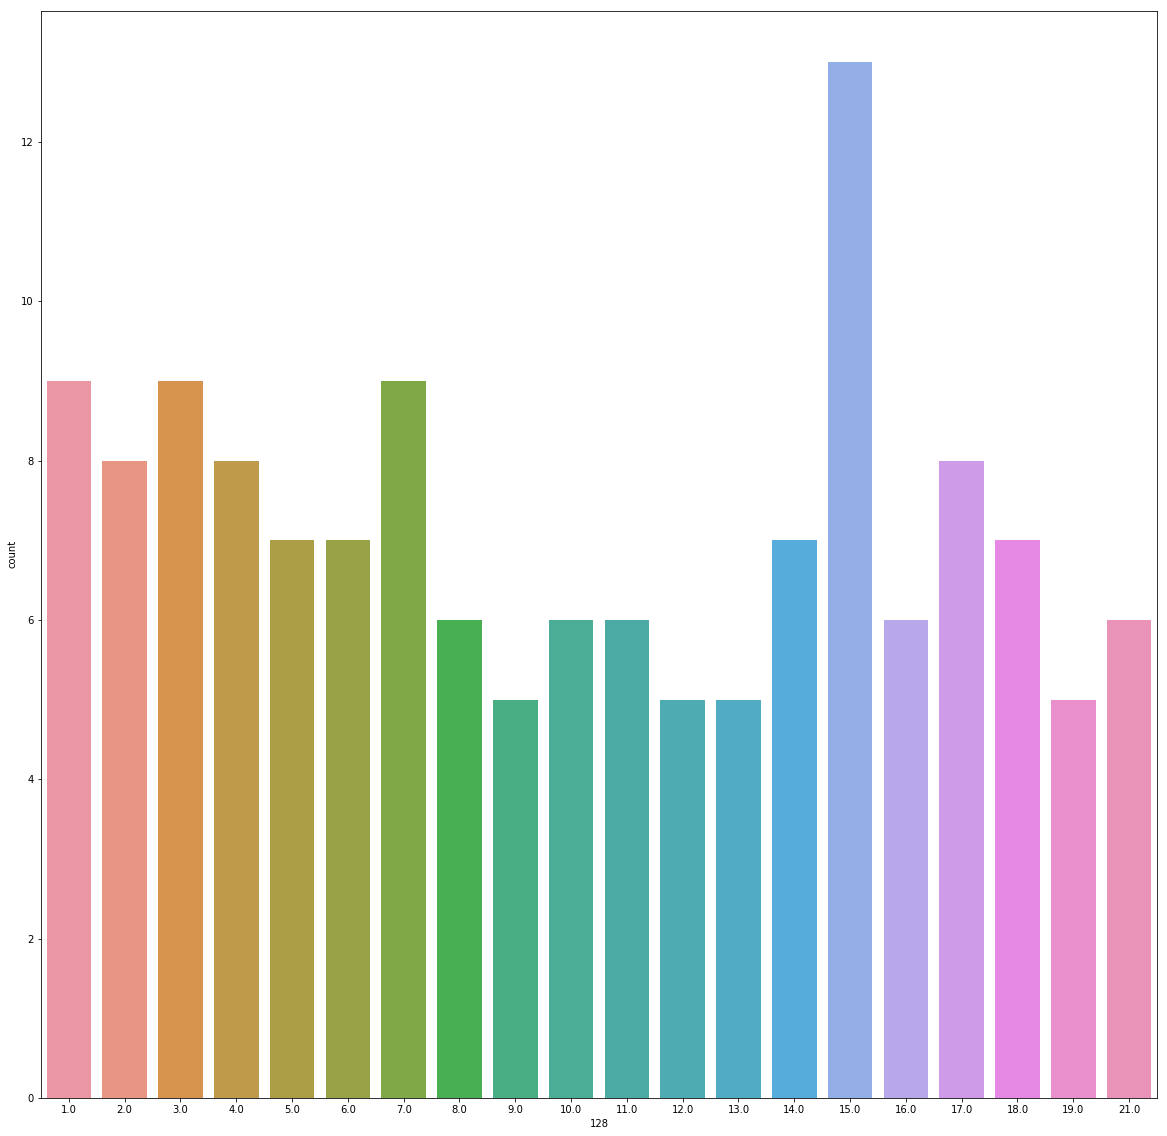

In [68]:
import seaborn as sns
plt.figure(figsize=(20,20))
ax = sns.countplot(x=128, data=emb_data)